In [24]:
import numpy as np 
import pandas as pd 

# np.__version__

In [ ]:
df = pd.read_csv("data/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [26]:
df.shape

(13320, 9)

In [27]:
df.groupby("area_type").agg("count")

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [28]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [29]:
df2 = df.drop(["area_type","society","balcony"],axis = 1)
df2.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [30]:
df2.isna().sum()

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [31]:
df3 = df2.dropna()      # drom all the rows with any null value
df3.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [32]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [33]:
df3["BHK"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))    # to filter out unwanted things data cleaning and converting it into an int
df3.head()

/tmp/ipykernel_67928/2293639459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))    # to filter out unwanted things data cleaning and converting it into an int


,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [34]:
df3["BHK"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [35]:
df3[df3.BHK > 20]       # there are some wrong total_sqft in data as you can see

,availability,location,size,total_sqft,bath,price,BHK
1718,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [36]:
df3.total_sqft.unique()         

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [37]:
# as there are some values in  a given range we modify them
def is_Float(x):
    try:
        float(x)
    except:
        return False
    return True

In [38]:
df3[~df3["total_sqft"].apply(is_Float)].head()      # added not funtion

,availability,location,size,total_sqft,bath,price,BHK
30,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [39]:
def convert_to_mean(x):
    tokens = x.split("-")
    if(len(tokens) == 2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return False

In [40]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_to_mean)
df4.head()

,availability,location,size,total_sqft,bath,price,BHK
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [41]:
df4.loc[30]

availability       19-Dec
location        Yelahanka
size                4 BHK
total_sqft         2475.0
bath                  4.0
price               186.0
BHK                     4
Name: 30, dtype: object

In [42]:
df5 = df4.copy()
print(df5.shape)
# print(df4.loc[410])
df5[(df5["total_sqft"].astype("float")) == 0].shape
# (df5["total_sqft"].astype("float64")).sort_values()

(13246, 7)


(46, 7)

In [43]:
df5 = df5.drop((df5[(df5["total_sqft"].astype("float")) == 0].index))     # all entries 0 entries arre
# df5 = df5[(df5["total_sqft"].astype("float")) == 0]

In [44]:
df5[(df5["total_sqft"].astype("float")) == 0].shape

(0, 7)

In [45]:
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]  
df5.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


In [46]:
len(df5.location.unique())          

1298

# Curse of Dimensionality

The **Curse of Dimensionality** refers to various challenges that arise when analyzing or organizing data in high-dimensional spaces. As the number of dimensions (features) increases, the complexity of the data grows, leading to several issues:

## Problems with High Dimensions

1. **Increased Sparsity**  
   As dimensions increase, data points become sparse. In high-dimensional spaces, even large datasets may not have enough points to cover the space effectively, making it hard to find meaningful patterns.

2. **Distance Becomes Less Meaningful**  
   In high-dimensional spaces, the distances between points tend to converge. This makes it difficult for distance-based algorithms like k-Nearest Neighbors (k-NN) to work effectively.

3. **Overfitting**  
   More dimensions make it easier for models to memorize the training data, leading to overfitting. This means the model performs well on training data but poorly on unseen data.

4. **Increased Computational Complexity**  
   The computational cost of algorithms increases exponentially with more dimensions, making analysis and model training much slower.

## Example

Consider a dataset with 3 features (3D space) and a dataset with 100 features (100D space). In 3D, you can easily visualize and understand relationships between data points. But in 100D, even basic tasks like measuring distance become difficult and lose their meaning.

## How to Mitigate the Curse of Dimensionality

1. **Dimensionality Reduction**
   - Use techniques like **Principal Component Analysis (PCA)** or **t-SNE** to reduce the number of dimensions while preserving important information.

2. **Feature Selection**
   - Identify and keep only the most relevant features, reducing noise and simplifying the model.

3. **Regularization**
   - Apply regularization techniques like **Lasso** to penalize the model for using too many features, reducing overfitting.

## Conclusion

The curse of dimensionality is a critical challenge in machine learning and data analysis. By reducing dimensions and applying feature selection, we can co


In [47]:
df5.groupby('location')['location'].agg('count').sort_values(ascending=False)     

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [48]:
# Step 1: Group by 'location' and count the occurrences of each location
location_counts = df5.groupby('location')['location'].agg('count')
# Step 2: Filter out locations that have more than 10 occurrences
locations_to_keep = location_counts[location_counts <= 10].index

# Step 3: Filter df5 to keep only rows where 'location' is in locations_to_keep
df5.location = df5.location.apply(lambda x: 'Other' if x in locations_to_keep else x) 
len(df5.location.unique())

241

In [49]:
df5.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


In [50]:
# removing outliers
df5.price_per_sqft = df5.price_per_sqft.astype("float")
df5.total_sqft = df5.total_sqft.astype("float")

In [51]:
df5.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [52]:
df5[df5["total_sqft"]/df5["BHK"] < 300].head()         # setting 300 as am threshold

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Ready To Move,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Ready To Move,Other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Ready To Move,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [53]:
df5.shape

(13200, 8)

In [54]:
df6 = df5[~(df5["total_sqft"]/df5["BHK"] < 300)]
df6.head()

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [55]:
df6.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,111.187960,2.649004,6308.502826
std,1260.404795,1.080275,152.203367,0.976046,4168.127339
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [56]:
def remove_pps_outliers(df:pd.DataFrame) -> pd.DataFrame:        # remove outliers that are present in the data 
    df_out = pd.DataFrame()
    # print(df.groupby("location"))
    for key,subdf in df.groupby("location"):
        # print(subdf.groupby("location"))
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        IQR_df = subdf[(subdf.price_per_sqft > (mean - std)) & ((subdf.price_per_sqft < (mean + std)))]
        df_out = pd.concat([df_out,IQR_df])
    
    return df_out

df7 = remove_pps_outliers(df6) 
# df7.iloc[50:60]
df7.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10245.000000,10245.000000,10245.000000,10245.000000,10245.000000
mean,1503.808170,2.474085,90.977270,2.572279,5657.835532
std,876.776542,0.981992,86.139369,0.897398,2266.165749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5173.279759
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [57]:
df7.shape

(10245, 8)

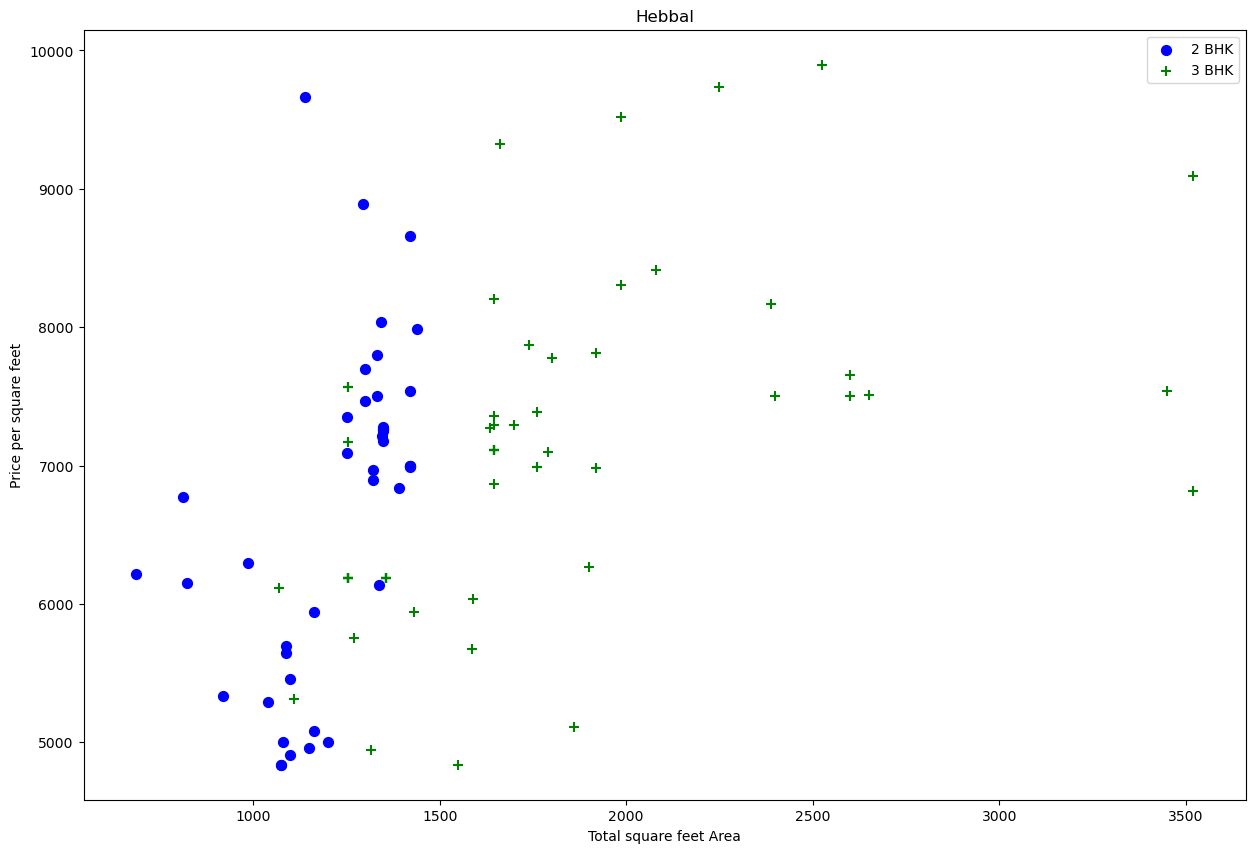

In [58]:
import matplotlib.pyplot as plt

def plot_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total square feet Area")
    plt.ylabel("Price per square feet")
    plt.title(location) 
    plt.legend()

plot_scatter(df7,"Hebbal")

In [59]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location,location_df in df.groupby('location'):
        bhk_stats = {}

        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            } 
        
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
        
    return df.drop(exclude_indices, axis="index")

df8 = remove_bhk_outliers(df7)
df8.shape


(7331, 8)

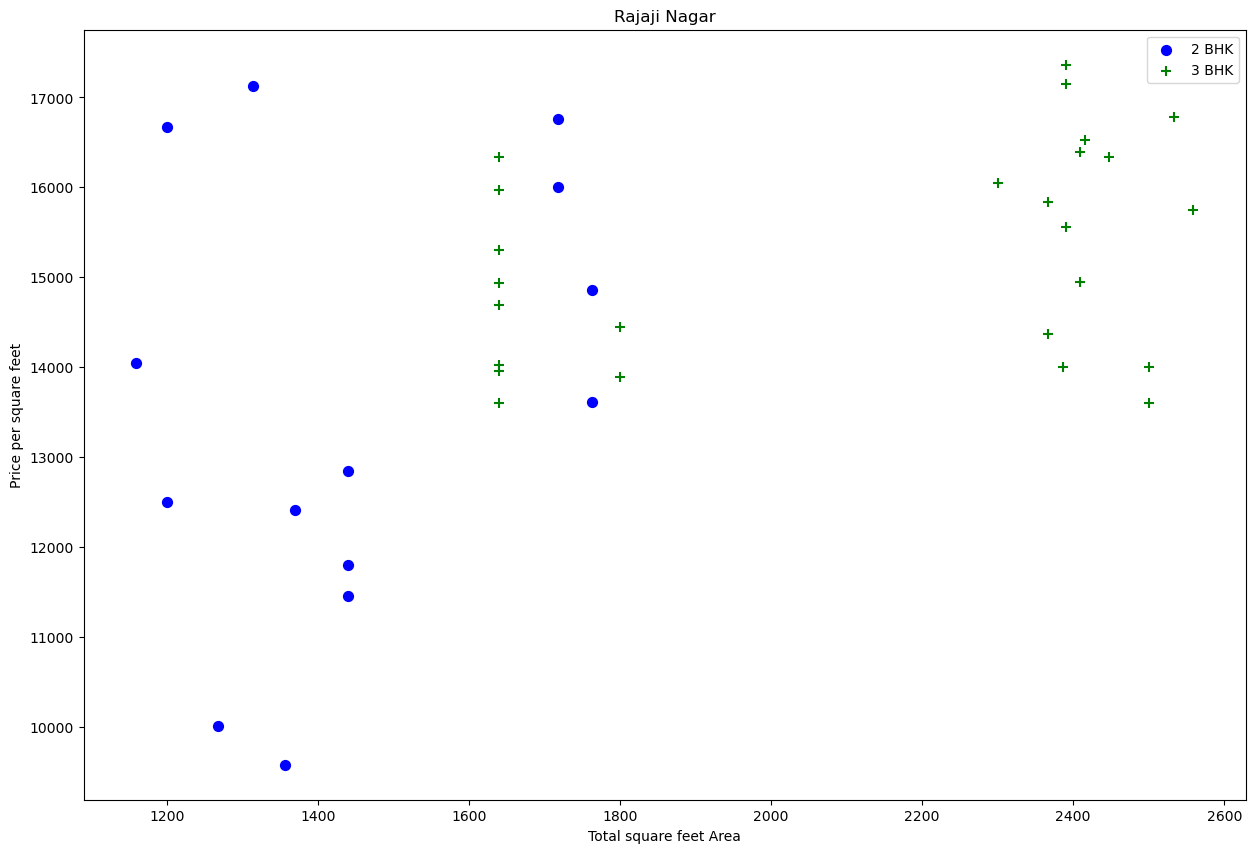

In [60]:
plot_scatter(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

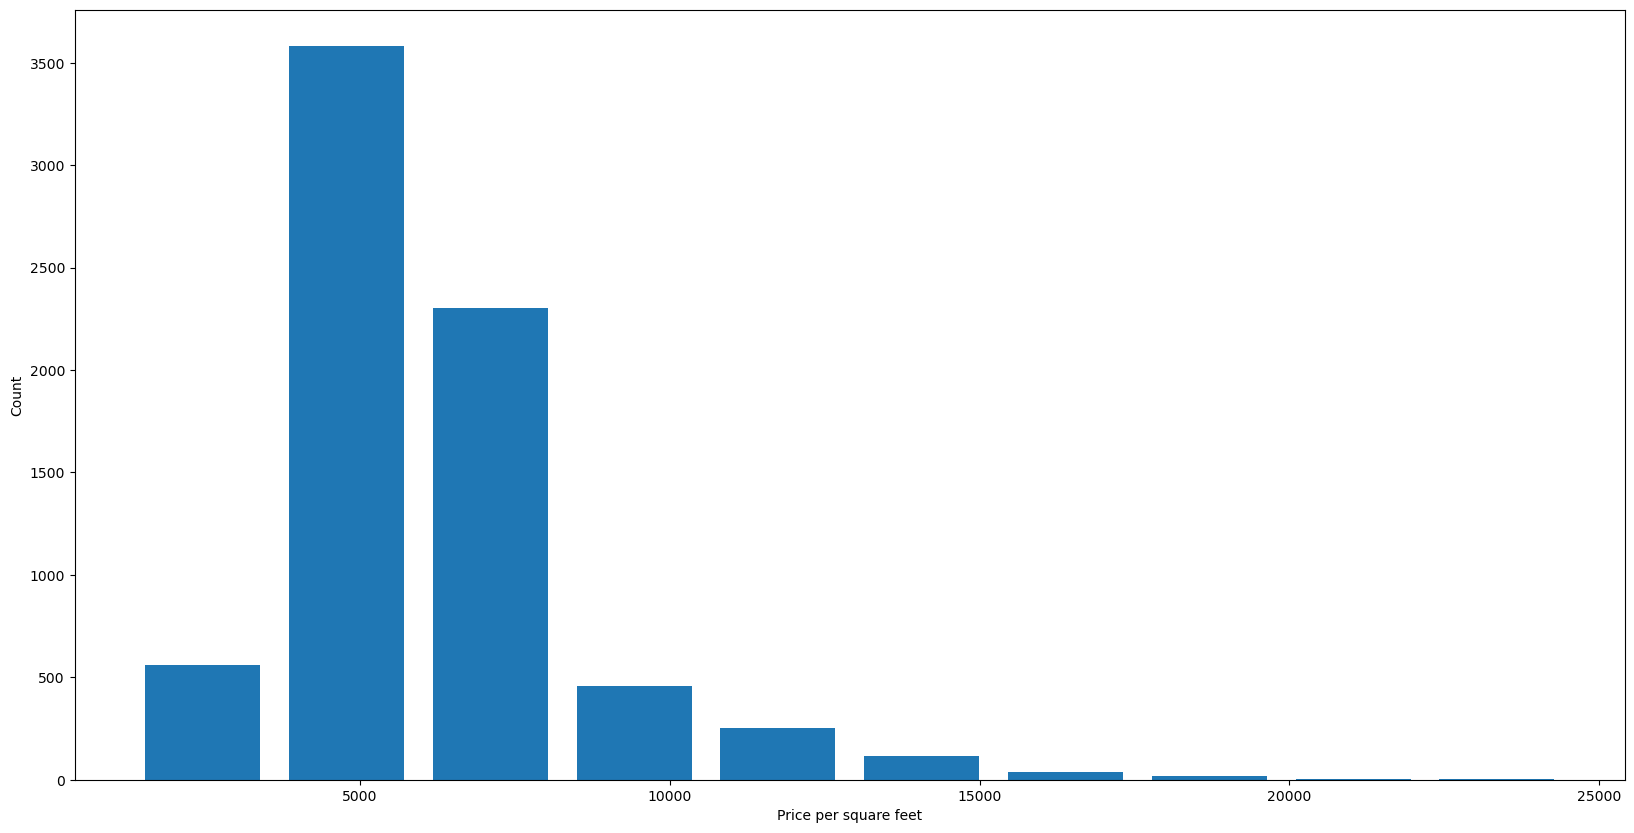

In [61]:
plt.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [62]:
df8[df8.bath > 10]

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
8636,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
3096,Ready To Move,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,Ready To Move,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,Ready To Move,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,Ready To Move,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


(array([4.770e+03, 1.763e+03, 6.760e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

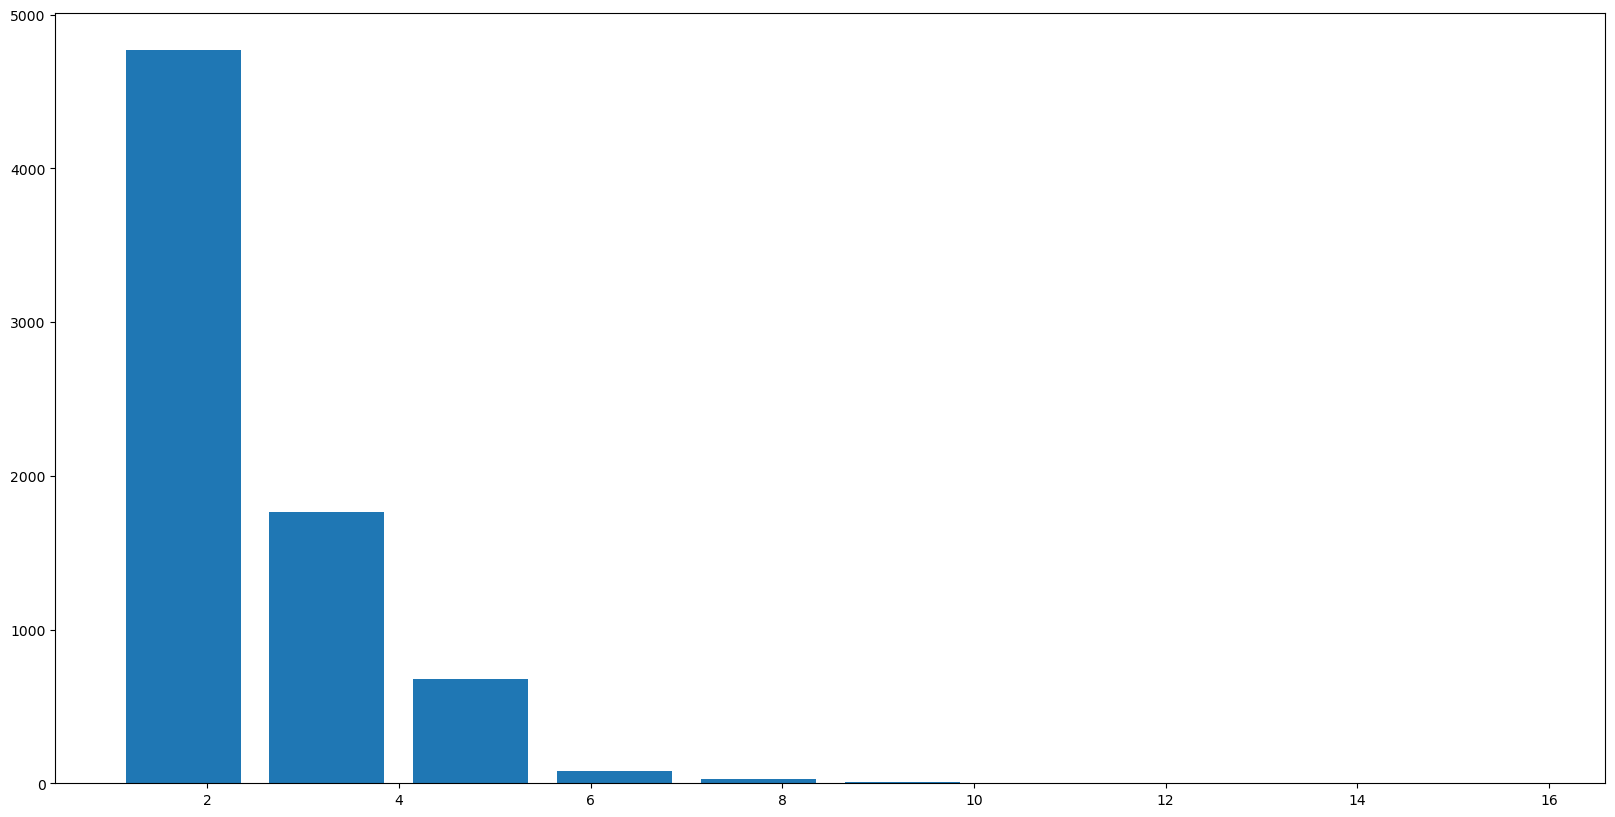

In [63]:
plt.hist(df8.bath,rwidth=0.8)

In [64]:
df8[df8.bath > df8.BHK+2]

,availability,location,size,total_sqft,bath,price,BHK,price_per_sqft
7709,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
2620,Ready To Move,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
12103,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [65]:
df9 = df8[df8.bath < df8.BHK+2]
df9.shape
# df9

(7253, 8)

In [66]:
df10 = df9.drop(['size', 'price_per_sqft'],axis="columns")
df10.head()

,availability,location,total_sqft,bath,price,BHK
341,Ready To Move,Devarachikkanahalli,1250.0,2.0,40.0,2
2474,Ready To Move,Devarachikkanahalli,1200.0,2.0,83.0,2
5030,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,2
5771,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,3
6591,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,2


## **One Hot Encoding**

In [67]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df11 = pd.concat([df10,dummies.drop('Yeshwanthpur',axis='columns')],axis='columns')
df11

,availability,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
341,Ready To Move,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,Ready To Move,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11649,Ready To Move,Yeshwanthpur,1195.0,2.0,100.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11785,18-Aug,Yeshwanthpur,1692.0,3.0,108.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12133,Ready To Move,Yeshwanthpur,2500.0,5.0,185.0,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13017,Ready To Move,Yeshwanthpur,1855.0,3.0,135.0,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df12 = df11.drop(['location','availability'],axis='columns')
df12.head()

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
341,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
df12.shape

(7253, 244)

In [71]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
341,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2474,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5030,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5771,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6591,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
y = df12.price
y.head()

341     40.0
2474    83.0
5030    40.0
5771    65.0
6591    43.0
Name: price, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8282622786924241

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87137623, 0.81442362, 0.84890188, 0.8912152 , 0.85727867])

In [76]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()),  # Adding StandardScaler here
            'params': {
                'linearregression__fit_intercept': [True, False],  # Correctly referencing parameters of the pipeline
                'linearregression__n_jobs': [None, 1, -1]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        model = config['model']
        params = config['params']

        grid_search = GridSearchCV(model, params, cv=cv, return_train_score=False)
        grid_search.fit(X, y)
        
        scores.append({
            'model': algo_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


find_best_model(X,y)


/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constrai

,model,best_score,best_params
0,linear_regression,0.856639,"{'linearregression__fit_intercept': True, 'lin..."
1,lasso,0.728437,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.809376,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [77]:
X.columns

Index(['total_sqft', 'bath', 'BHK', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield', 'Yelachenahalli',
       'Yelahanka', 'Yelahanka New Town', 'Yelenahalli'],
      dtype='object', length=243)

In [78]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

In [79]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]

In [80]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.08036942620717

In [81]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.95842611859103

In [82]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.69846443399935

In [83]:
predict_price('Indira Nagar',1000,2,2)

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


192.42961277613298

In [84]:
predict_price('Indira Nagar',1000,3 ,3)

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


196.0477077839252

# Export to the Flask Server

In [85]:
import pickle

with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr,f)

In [86]:
import json 

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))